# Study of fitness centre customers churn

**Project aim**: analysis of the churn and development of the customer retention plan.

**Goals:**
- monthly churn probability forecast;
- typical customer portraits and their characteristics;
- analysis of the main features affecting customer churn;
- recommendations for working with clients to reduce churn. 


Content:
1. [Data descrption](#id_description)
2. [Import](#import)
3. [Preprocessing and EDA](#eda_id)
    - [Data analysis taking into consideration customers churn](#groups)
4. [Prediction of customers churn](#churn_prediction)
5. [Clusterization](#clusters)
6. [Conclusions](#conclusions)

## Data description<a id="id_description"></a>

Dataset includes the following fields:

- $Churn$ - churn in the present month;
- $gender$ - gender;
- $Near$_$Location$ - job or living address near fitness club;
- $Partner$ - staff of the partner company;
- $Promo$_$friends$ - the fact of the signing up withing the promo action "bring a friend" (a customer used the promo code obtained from a friend);
- $Phone$ - presence of contact phone number;
- $Age$ - age;
- $Lifetime$ - time passed from the moment of the first visit, months.

The above mentioned information is presented for the period, previous to the churn.

Information based on the visits log data and purchases data, as well as informaton about the subscription status: 

- $Contract$_$period$ — duration of the present active member card (1 month, 3 months, 6 months, 1 year);
- $Month$_ $to$_ $end$_$contract$ — time before the end of the member card (months);
- $Group$_$visits$ — the fact of group training visits;
- $Avg$_ $class$_ $frequency$_$total$ — average visits per week for all the period starting from the subscription;
- $Avg$_ $class$_ $frequency$_ $current$_$month$ — average visits per week for the previous month;
- $Avg$_ $additional$_ $charges$_$total$ — total revenue from other services: cafe, sport shop, cosmetics and massage services.

## Libraries import<a id = 'import'></a>

In [1]:
!pip install seaborn -U
!pip install matplotlib.pyplot -U
!pip install pandas -U

Requirement already up-to-date: seaborn in c:\python\anaconda\lib\site-packages (0.11.2)


ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


Requirement already up-to-date: pandas in c:\python\anaconda\lib\site-packages (1.3.3)


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from scipy import stats as st
from math import factorial
import math as mth

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import os

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

## Data preprocessing and EDA <a id = 'eda_id'><a/>

In [7]:

path = 'C:/Python/datasets/'

if os.path.exists(path):
    df = pd.read_csv(path + 'gym_churn.csv')
else:
    df = pd.read_csv('/datasets/gym_churn.csv')
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


Change the name of the columns:

In [8]:
df.rename(columns = {'Near_Location':'near_location',
                    'Partner':'partner',
                     'Promo_friends':'promo_friends', 'Phone':'phone', 
                     'Contract_period':'contract_period', 'Group_visits':'group_visits',
                     'Age':'age', 'Avg_additional_charges_total':'avg_additional_charges_total',
                     'Month_to_end_contract':'month_to_end_contract',
                     'Lifetime':'lifetime',
                     'Avg_class_frequency_total':'avg_class_frequency_total',
                     'Avg_class_frequency_current_month':'avg_class_frequency_current_month',
                     'Churn':'churn'
                    }, inplace = True)

In [9]:
df.columns = map(str.lower, df.columns)

Dataset size and general information:

In [10]:
display(df.shape)
df.info()

(4000, 14)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

Null values are abscent. Data types present are int64 or float64.

In [11]:
#duplicates:
df.duplicated().sum()

0

Duplicates are abscent.

Distribution of the data: mean values and standart deviations: 

In [12]:
#non binary columns:
df.drop(['churn', 'gender', 'near_location', 'partner', 'promo_friends', 
        'phone', 'group_visits'], axis = 1).describe()

,contract_period,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,4.681250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052
std,4.549706,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906
min,1.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000
25%,1.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003
50%,1.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574
75%,6.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336
max,12.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783


Columns "contract_period" and "month_to_end_contract" are redundant from the information point of view and may negatively affect a linear model training, this must be taken into account in the further analysis and data regularization.

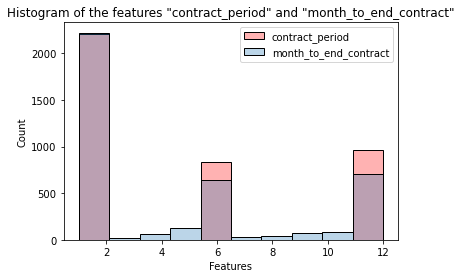

In [13]:
plt.figure()
ax = sns.histplot(data = df['contract_period'], color = 'red', alpha = 0.3, label = 'contract_period', bins = 10)
ax = sns.histplot(data = df['month_to_end_contract'], alpha = 0.3, label = 'month_to_end_contract', bins = 10)
plt.legend()
ax.set_xlabel('Features')
plt.title('Histogram of the features "contract_period" and "month_to_end_contract"')
plt.show()

For the majority of customers, period till the end of the subscription is 1, 6 or 12 months, which is correlated with the options of member cards of the fitness centre. 

In [14]:
df['contract_period'].unique()

array([ 6, 12,  1], dtype=int64)

Standard deviations of avg_class_frequency_total and avg_class_frequency_current_month columns are not very high, the distribution is normal, shifted to the right.For these features multicollinearity is possible. Let's look at the histogram:

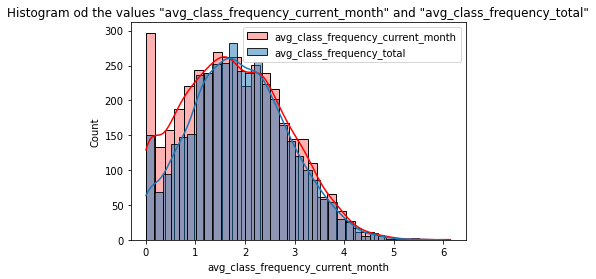

In [15]:
plt.figure()
sns.histplot(df['avg_class_frequency_current_month'], kde = True, color = 'red', alpha = 0.3, 
             label = 'avg_class_frequency_current_month')
sns.histplot(df['avg_class_frequency_total'], kde = True, label = 'avg_class_frequency_total')
plt.legend()
ax.set_xlabel('Feature values')
ax.set_ylabel('Frequency')
plt.title('Histogram od the values "avg_class_frequency_current_month" and "avg_class_frequency_total"')
plt.show()

The rest feaures: age, avg_additional_charges_total and lifetime have higher standard deviations. The "age" values are distributed normally. Values of "avg_additional_charges_total" and "lifetime" are distributed according to Poisson distribution. 

In [16]:
#non binary columns:
df[['churn', 'gender', 'near_location', 'partner', 'promo_friends', 
        'phone', 'group_visits']].describe()

,churn,gender,near_location,partner,promo_friends,phone,group_visits
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.265250,0.510250,0.845250,0.486750,0.308500,0.903500,0.412250
std,0.441521,0.499957,0.361711,0.499887,0.461932,0.295313,0.492301
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Standard deviations of the majority of the binary features (churn, gender, partner, promo_friends, group_visits) are quite high which indicated the high data scatter. Let's see the distribution on the following graphs:

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


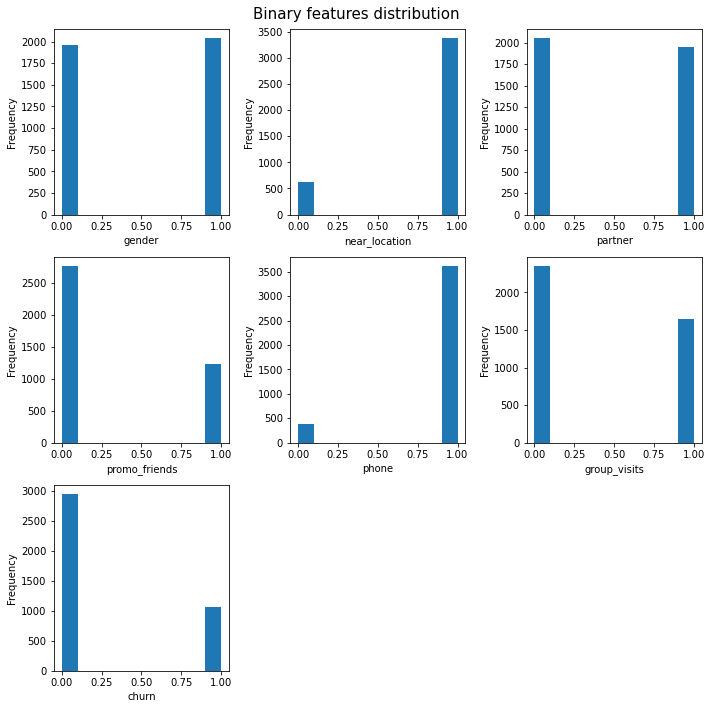

In [17]:
df_10 = df[['gender', 'near_location', 'partner', 'promo_friends','phone', 'group_visits', 'churn']]
#columns and rows of the plot:
ncols = 3
nrows = int(np.ceil(len(df_10.columns) / (1.0*ncols)))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 10))
fig.suptitle('Binary features distribution', fontsize=15)
#plot
counter = 0
for i in range(nrows):
    for j in range(ncols):

        ax = axes[i][j]
        # Plot when we have data
        if counter < len(df_10.columns):

            ax.hist(df_10[df_10.columns[counter]])
            ax.set_xlabel('{}'.format(df_10.columns[counter]))
            ax.set_ylabel('Frequency')
            leg = ax.legend(loc='upper left')
            leg.draw_frame(False)

        # Remove axis when we no longer have data
        else:
            ax.set_axis_off()

        counter += 1
plt.tight_layout()
plt.show()


Thus, we see that gender and woring in member companies have the distribution close to 1:1. The rest of the features are distributed not equally and have one of the values prevailing.  

### Data analysis taking into consideration the churn <a id = 'groups'></a>

Let's look at the average values in two groups of customers: those who left and those who stayed.

In [18]:
df_churn = df.groupby('churn').agg('mean')
df_churn = df_churn.T
df_churn['abs'] = (df_churn[0] - df_churn[1]).abs()
df_churn['abs_perc'] = (df_churn['abs']/(df_churn[0] + df_churn[1]))*100
df_churn.sort_values(by = 'abs_perc', ascending = False)

churn,0,1,abs,abs_perc
lifetime,4.711807,0.990575,3.721232,65.257502
contract_period,5.747193,1.728558,4.018635,53.755603
month_to_end_contract,5.283089,1.662582,3.620507,52.126087
avg_class_frequency_current_month,2.027882,1.044546,0.983336,32.005188
promo_friends,0.353522,0.183789,0.169733,31.589320
group_visits,0.464103,0.268615,0.195489,26.679969
partner,0.534195,0.355325,0.178870,20.108603
avg_additional_charges_total,158.445715,115.082899,43.362816,15.853119
avg_class_frequency_total,2.024876,1.474995,0.549881,15.711467
near_location,0.873086,0.768143,0.104943,6.394160


Thus, we can observe the biggest difference between the two groups in lifetime and contract_period/month_to_end_contract. Also, quite strong differences are observed in avg_class_frequency_current_month, promo_friends, group_visits and partner.


Let's build histograms for the features of the two groups.

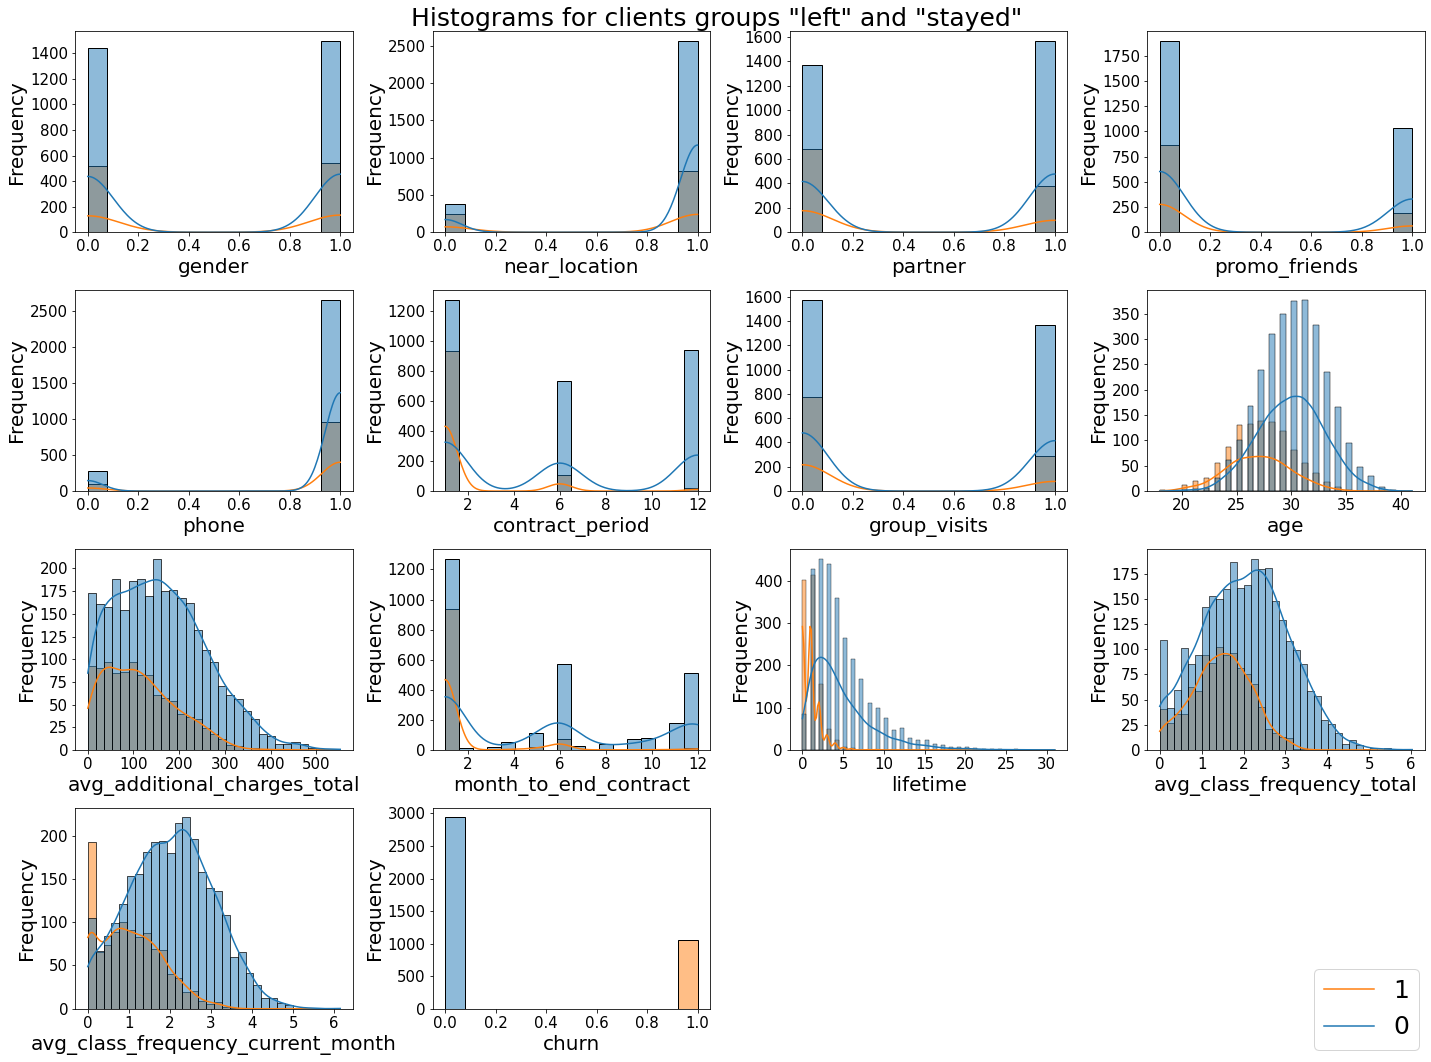

In [19]:
ncols = 4
nrows = int(np.ceil(len(df.columns) / (1.0*ncols)))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 15))
fig.suptitle('Histograms for clients groups "left" and "stayed"', fontsize=25)
#plot
counter = 0
for i in range(nrows):
    for j in range(ncols):
        # Plot when we have data
        ax = axes[i][j]
        if counter < len(df.columns):
            ax = sns.histplot(data = df, x = df[df.columns[counter]], kde = True, color = 'skyblue', hue = 'churn', 
                         ax = ax, alpha = 0.5, legend = False)
            #ax = sns.displot(df, x=df[df.columns[counter]], hue="churn", stat="density", ax = ax)
            ax.set_xlabel('{}'.format(df.columns[counter]), fontsize = 20)
            ax.set_ylabel('Frequency', fontsize = 20)
            plt.setp(ax.get_xticklabels(), fontsize=15)
            plt.setp(ax.get_yticklabels(), fontsize=15)

        # Remove axis when we no longer have data
        else:
            ax.set_axis_off()

        counter += 1
plt.tight_layout()
fig.legend([1, 0], loc = 4, fontsize = 25)
plt.show()




Many of the distributions have obvious differences for the two groups (churn 1/churn 0). There is an interesting pick for the values of "avg_class_frequancy_current_month" in churn_1 group, and its abscence for the "avg_class_frequency_total" in the same group. Maybe some churn_1 clients don't appear in the club at all after the registration. 

Among those, who stayed there are  more customers who work in partners-companies, and opposite for those clients who left. Probably, this strategy is indeed efficient for client retention.

In addition, smaller percent of those who attend group training is observed among the clients of churn_1 group.

Let's build a correlation matrix:

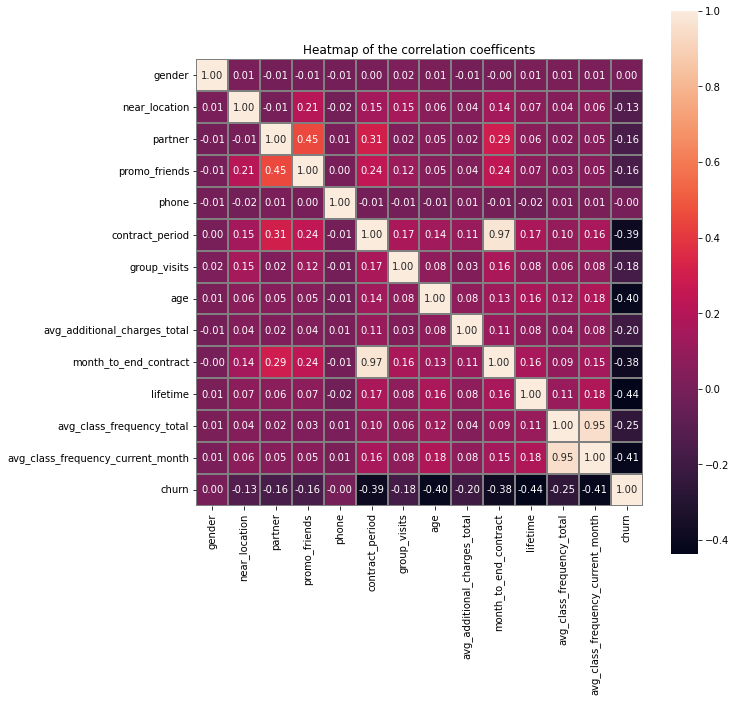

In [20]:
plt.figure(figsize = (10,10))
cm = df.corr()
sns.heatmap(cm, annot = True, square=True, fmt='.2f', linewidths=1, linecolor='gray')
plt.title('Heatmap of the correlation coefficents')
plt.show()

Weak negative correlation is observed for the churn and contract period, age, number of months before the end of the contract, lifetime and average visit frequency in the current month. Weak positive correlation is observed between promo_friend and partner values, which is probably correlated with the info distribution among the colleagues. 

Very strong correlation is observed between features "month_to_end_contract" and "contract_period" as well as for "avg_class_frequency_current_month" and "avg_class_frequency_total". This correlation is explained by multicollinearity of the features.


## Churn prediction<a id = 'churn_prediction'><a/>

Let's build a binary classification model, where the target feature is the fact of client churn in the next month:

In [21]:
# devide data into features (matrix X) and target feature (y)
X = df.drop(columns=['churn'])
y = df['churn']
#devide data into training and validation (20%) samples:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Train model using 2 ways: logistic regression and random forest and calculate following metrics: precision, recall, f1_score, roc_auc_score. Accuracy metric is not suitable for the present dataset because the classes are distributed not evenly: churn_1 group is smaller in comparison to churn_0 group.

In [22]:
#Logistic Regression
lr_model = LogisticRegression(random_state = 0, solver='liblinear')
lr_model.fit(X_train, y_train)
#прогнозирование:
probabilities = lr_model.predict_proba(X_test)[:, 1]
predictions = lr_model.predict(X_test)
#метрики:
print('Metrics for Logistic Regression:')
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, predictions)))
print('ROC_AUC: {:.2f}'.format(roc_auc_score(y_test, probabilities)))

Metrics for Logistic Regression:
Precision: 0.86
Recall: 0.83
F1: 0.85
ROC_AUC: 0.97


Logistic regression works very well on the dataset. 85% of the predictions are correct.

In [23]:
#random forest
# set an algorithm for the new model based on the RandomForestClassifier:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_probabilities = rf_model.predict_proba(X_test)[:, 1]
#метрики:
print('Metrics для Random Forest:')
print('Precision: {:.2f}'.format(precision_score(y_test, rf_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, rf_predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, rf_predictions)))
print('ROC_AUC: {:.2f}'.format(roc_auc_score(y_test, rf_probabilities)))

Metrics для Random Forest:
Precision: 0.84
Recall: 0.82
F1: 0.83
ROC_AUC: 0.97


Random forest model has almost the same presicion in comparison to logistic regression, however shows a little bit worse value. Therefore, the logistic regression model is more efficient.

## Clients clusterization<a id = 'clusters'><a/>

First, let's standardize data:

In [24]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

Let's construct a distance matrix using the linkage () function:

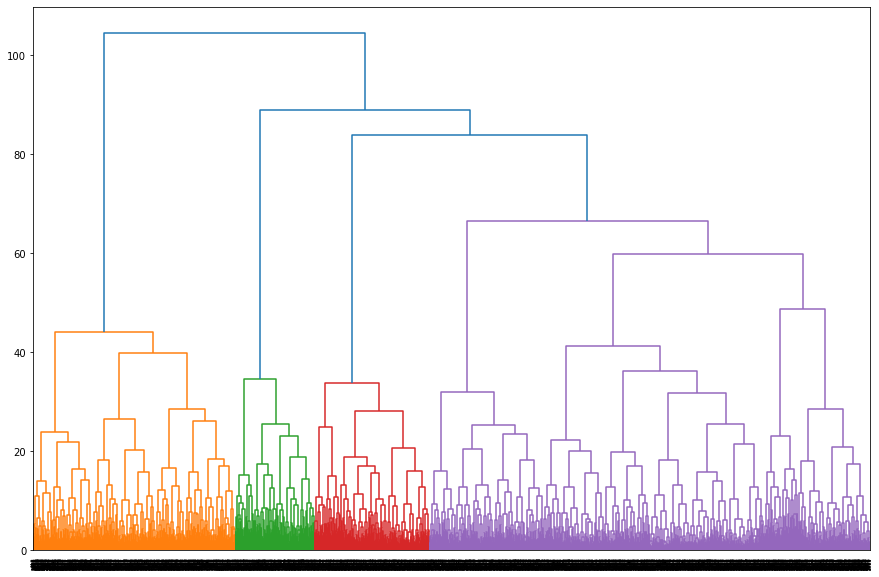

In [25]:
linked = linkage(X_sc, method = 'ward') 
#plot
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.show() 

Thus, an optimal number of clusters are 4. Let's set the model based on the algorithm K-means using 4 as number of clusters.

In [26]:
km = KMeans(n_clusters = 4, random_state = 0) ### random_state is needed
# predict clusters for the data (algorithm gives them numbers from 0 to 3)
labels = km.fit_predict(X_sc) #without training, because this model is "model without a teacher".

Let's creat a new column in the df which contains the cluster information :

In [27]:
df['cluster_km'] = labels

In [28]:
df.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn,cluster_km
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0,2
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0,3
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0,2
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0,3


Let's see the average feature values in different clusters:

In [29]:
df.groupby('cluster_km').agg('mean')

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,,,
0,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,1.723967,0.266839
1,0.541509,0.866038,0.334906,0.200000,1.0,2.383962,0.450943,29.998113,157.888187,2.221698,4.710377,2.712339,2.698750,0.092453
2,0.503238,0.940796,0.777983,0.573543,1.0,10.690102,0.532840,29.899167,161.051935,9.760407,4.721554,1.993064,1.984827,0.029602
3,0.489477,0.755601,0.386286,0.192804,1.0,1.899525,0.291921,28.044128,129.431049,1.806517,2.227427,1.202154,0.948054,0.562118


You can immediately notice the differences in individual characteristics between the clusters. Thus, **cluster 3** has higher average values of "contact_period", "partner", "group_visits", "avg_additional_charges_total", "month_to_end_contract" and **the lowest churn** compared to other clusters. That is, this group of clients is the most reliable and constant. It can be concluded that such clients are more often employees of partner companies, more often come using promo-code from a friend, more often attend group trainings, on average, their contract period is much longer in comparison to other groups and such clients, on average, spend more money on additional services.

The next most promising cluster is **cluster 2**. It has the highest scores for "avg_class_frequency_current_month" and "avg_class_frequency_total". That is, such clients visit fitness club more often, come mostly using the promo code given by friends and are not employees of partner companies. Interestingly, even with very low churn, the contract period for clients in cluster 2 is much shorter compared to clients in cluster 3.

**Cluster 1** has the highest churn rate, which makes this cluster's customers the most likely to leave. All features of this cluster have lower average values. Most of the features with low values are consequences of the customers tendency to leave, such as the length of the contract, the amount of additional costs, the lifetime, the average attendance. The factors "employee of the partner company" and "promo_friends" are interesting.

**Cluster 0** have not very high churn rate and its hallmark is the abscence of a phone number.

Distributions for the features in four clusters:

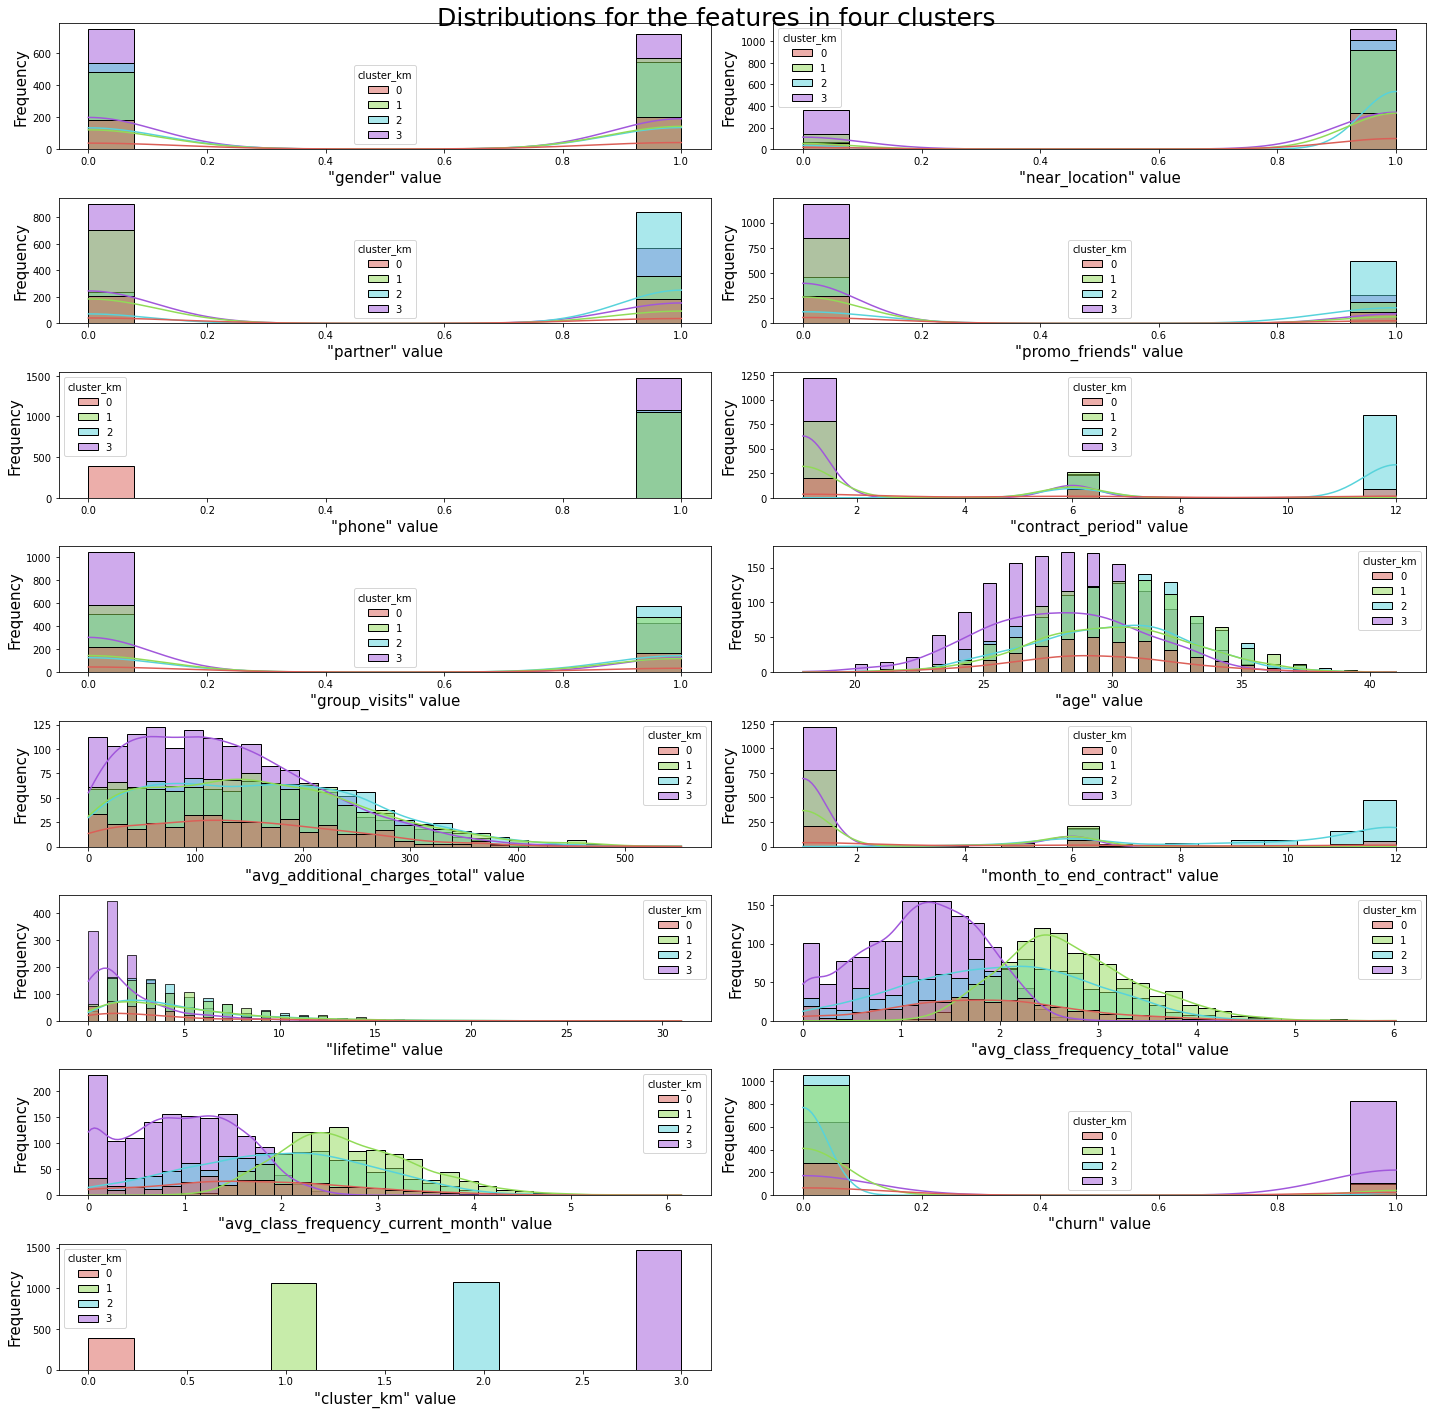

In [30]:
ncols = 2
nrows = int(np.ceil(len(df.columns) / (1.0*ncols)))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 20))
fig.suptitle('Distributions for the features in four clusters', fontsize=25)
#plot
palette = sns.color_palette("hls",4)
counter = 0
for i in range(nrows):
    for j in range(ncols):
        # Plot when we have data
        ax = axes[i][j]
        
        if counter < len(df.columns):
            ax = sns.histplot(data = df, x = df[df.columns[counter]], kde = True, hue = 'cluster_km', 
                         ax = ax, alpha = 0.5, palette = palette)
            ax.set_xlabel('"{}" value'.format(df.columns[counter]), fontsize = 15)
            ax.set_ylabel('Frequency', fontsize = 15)

        # Remove axis when we no longer have data
        else:
            ax.set_axis_off()

        counter += 1

plt.tight_layout()
plt.show()

The most succesfull cluster taking into account the values of the promo_friends, contact_period, group_visits, churn, month_to_end_contract and partner features is cluster 3. Cluster 2 has positive prediction for the churn as well, which means that clients in this cluster do not tend to leave. In comparison to cluster 3, cluster 2 shows, on average, higher attendace among all the clusters.

Similar tendency for the opposite values is observed for the cluster 1, where clients tend to leave. For example, graphs for avg_class_frequency, lifetime, additional_charges_total and contract period (both total and for the last month) have one-way accumulation of cluster 1 values.

The distribution of the values of cluste 0 features does not stand out in comparison to others, with the exception of the phone attribute, with clients of this cluster differ from others by the absence of a phone information in the database.

Looking at the total number of clients in different clusters, one can say that most of the clients, unfortunately, belong to cluster 1. Cluster 0 has the least number of clients.

Let's calculate how many customers are preent in each cluster:

In [31]:
df_clusters = df.groupby('cluster_km').agg('count')['age'].reset_index()
df_clusters.rename(columns = {'age':'total_clients'}, inplace = True)
df_clusters

,cluster_km,total_clients
0,0,386
1,1,1060
2,2,1081
3,3,1473


In [32]:
#percent
df_clusters['percent_of_total'] = df_clusters['total_clients']/(df_clusters['total_clients'].sum())*100
df_clusters

,cluster_km,total_clients,percent_of_total
0,0,386,9.650
1,1,1060,26.500
2,2,1081,27.025
3,3,1473,36.825


In [33]:
print('Clusters 0, 2 и 3 in total:')
print('{:.2f}'.format(df_clusters.query('cluster_km == 0 or cluster_km == 2 or cluster_km == 3')['percent_of_total'].sum()), '%')
print('Cluster 1:')
print('{:.2f}'.format(df_clusters.query('cluster_km == 1')['percent_of_total'].sum()), '%')

Clusters 0, 2 и 3 in total:
73.50 %
Cluster 1:
26.50 %


Thus, clients who tend to stay prevail over those, who tend to leave, and count 63.02%.

Let's caalculate churn rates for the clusters:

In [34]:
churn_rate = df.query('churn == 1').groupby('cluster_km')['churn'].count().reset_index()
churn_rate

,cluster_km,churn
0,0,103
1,1,98
2,2,32
3,3,828


In [35]:
churn_rate.rename(columns = {'churn':'churn_1'}, inplace = True)
#merge with df_clusters:
df_clusters = df_clusters.merge(churn_rate, on = 'cluster_km')
df_clusters

,cluster_km,total_clients,percent_of_total,churn_1
0,0,386,9.650,103
1,1,1060,26.500,98
2,2,1081,27.025,32
3,3,1473,36.825,828


,cluster_km,total_clients,percent_of_total,churn_1,churn_percent
0,0,386,9.650,103,26.683938
1,1,1060,26.500,98,9.245283
2,2,1081,27.025,32,2.960222
3,3,1473,36.825,828,56.211813


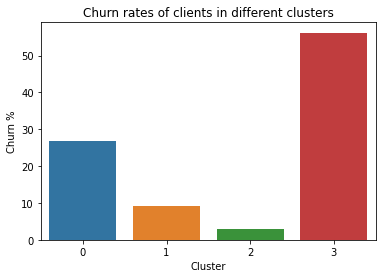

In [36]:
#add new column containing the part of churn == 1:
df_clusters['churn_percent'] = df_clusters['churn_1']/df_clusters['total_clients']*100
display(df_clusters)
#plot
plt.figure()
ax = sns.barplot(x = df_clusters['cluster_km'], y = df_clusters['churn_percent'])
ax.set_xlabel('Cluster')
ax.set_ylabel('Churn %')
plt.title('Churn rates of clients in different clusters')
plt.show()

Thus, the observations and conclusions shown above were confirmed: the most promising clients belong to clusters 2 and 3, cluster 0 is neutral, and cluster 1 is not promising: clients belonging to this cluster tend to leave.

Distribution of the age:

In [37]:
df.query('churn == 1')['age'].describe()

count    1061.000000
mean       26.989632
std         2.895163
min        18.000000
25%        25.000000
50%        27.000000
75%        29.000000
max        38.000000
Name: age, dtype: float64

In [38]:
df.query('churn == 0')['age'].describe()

count    2939.000000
mean       29.976523
std         3.009933
min        19.000000
25%        28.000000
50%        30.000000
75%        32.000000
max        41.000000
Name: age, dtype: float64

## Conclusions and recommendations<a id = 'conclusions'><a/>

### Conclusions

1. The most promising clients are clients belonging to cluster 3 (2.96% churn) and 2 (9.27% churn). 
2. Cluster 1 clients (55.98% churn) are not reliable and tend to leave. 
3. Features specific for promising clients/factors of client retention: 
    - group training attendance;
    - average visits per week ~2;
    - contract for more than 6 months;
    - working in a partner-company;
    - coming with the promo-code "Bring a friend.
    
4. Promising clients, on average, are older (avg 29-30 y.o.) than those who tend to leave (25th percentile is 28 y.o.).
5. Promising clients spend, on average, more money on additional services. 
6. Clients, spending more than 200 rub/month for additional services most probably will not leave.
7. Features of possible churn:
    - less than 1.5 visits per week.
    - contract for less than 6 months.
    
8. Clients of the partner-companies more often come with the promo code "Bring a friend". 

### Recommendations

For client retention we recommend to follow the following strategies:
1. Advertisement in partner companies. Conducting special promotions for employees of such companies within the framework of "Bring a friend". For example, discounts on additional services or a free month of subscription for three invited friends, etc.
2. Tracking the average number of visits per week. With an average visit of less than 1.5 times a week - sending out interesting articles about the benefits of fitness and other campaigns to stimulate interest and motivation to exercise.
3. Discounts for regular customers (more than 6 months membership) for their retention.
4. Analysing periods of the highest churn rate among groups of not promising clients and determining a month of "hot offers" for a half-year contract, aiming to reduce clients churn.